In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns
from sklearn.ensemble import IsolationForest
import joblib
os.chdir('Resources/')

In [2]:
df = pd.read_csv('6_Preprocessed_Data.csv')

X = df.drop(['HeartDisease'], axis='columns')
Y = df[['HeartDisease']]

Accuracy for train size 0.1 : 0.7327448974135877
Accuracy for train size 0.2 : 0.772909671465812
Accuracy for train size 0.30000000000000004 : 0.7868651224514417
Accuracy for train size 0.4 : 0.823489513213556
Accuracy for train size 0.5 : 0.8372315467943066
Accuracy for train size 0.6 : 0.8656396279871889
Accuracy for train size 0.7000000000000001 : 0.8952623699624093
Accuracy for train size 0.8 : 0.9145941118502094
Accuracy for train size 0.9 : 0.9359627329192548


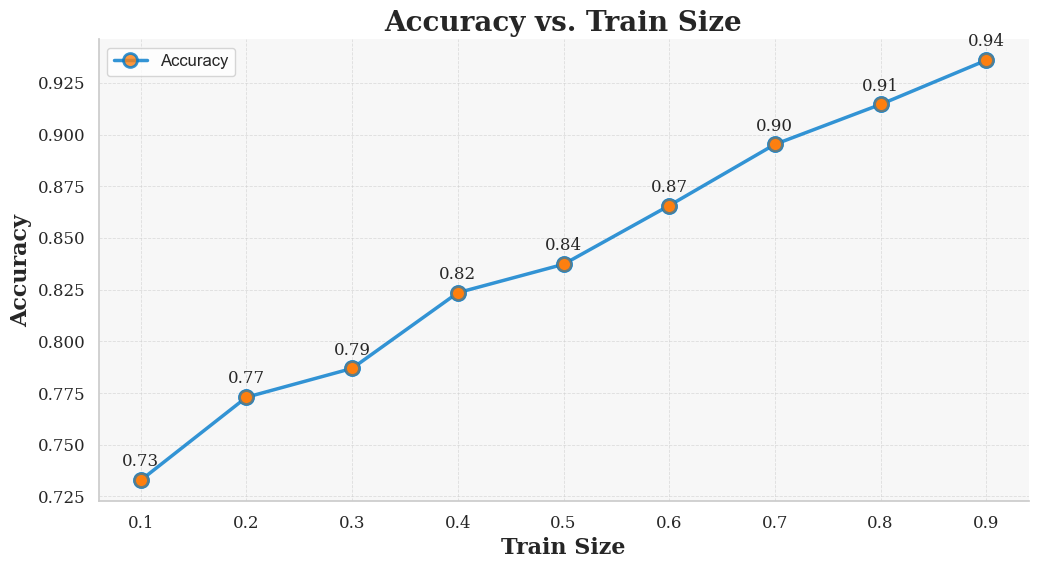

In [3]:
seed = 518

train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_rf = []
model_rf = None

for train_size in train_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
    
    rf = DecisionTreeClassifier(random_state=seed)
    model_rf = rf.fit(X_train, Y_train.values.ravel()) 
    
    pred = model_rf.predict(X_test)
    accuracy_rf = roc_auc_score(Y_test, pred)
    
    accuracies_rf.append(accuracy_rf)
    print("Accuracy for train size", train_size, ":", accuracy_rf)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracies_rf, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
plt.title('Accuracy vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(accuracies_rf):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], accuracies_rf[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['Accuracy'], fontsize=12)

sns.despine()

for i, txt in enumerate(accuracies_rf):
    plt.plot(train_sizes[i], accuracies_rf[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], accuracies_rf[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

Accuracy for train size 0.1: 0.7206043956043956
Accuracy for train size 0.2: 0.7679233621755254
Accuracy for train size 0.3: 0.7933592370187214
Accuracy for train size 0.4: 0.8191182529872271
Accuracy for train size 0.5: 0.8471810089020771
Accuracy for train size 0.6: 0.8708281829419036
Accuracy for train size 0.7: 0.8690280065897859
Accuracy for train size 0.8: 0.8800988875154512
Accuracy for train size 0.9: 0.9185185185185185


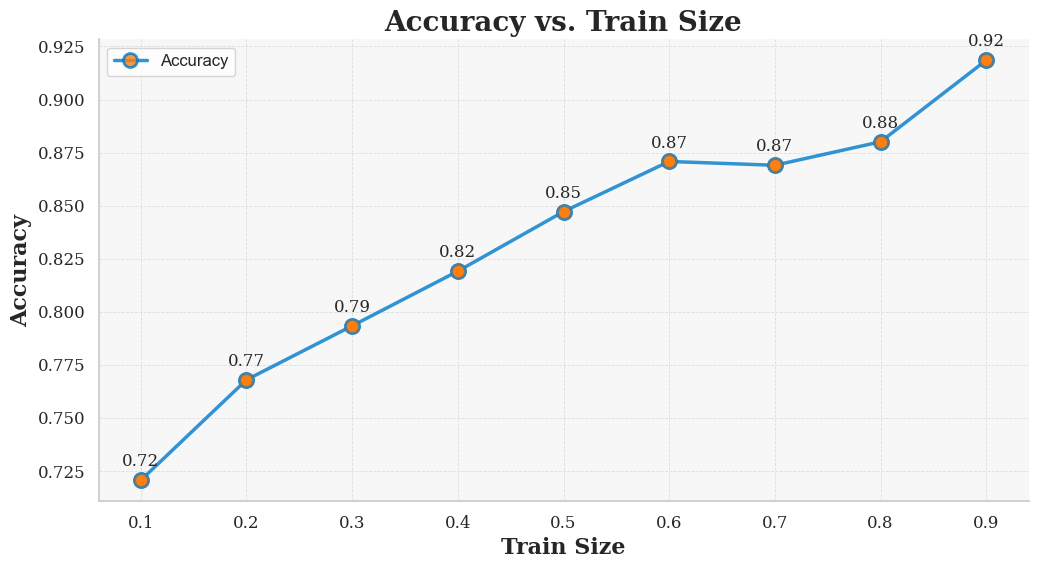

In [4]:
seed = 3089

train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_pca = []

for i, train_size in enumerate(train_sizes):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
    
    pca = PCA(n_components=9)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    rf_pca = RandomForestClassifier(random_state=seed)
    rf_pca.fit(X_train_pca, Y_train.values.ravel())
    
    pred_pca = rf_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(Y_test, pred_pca)
    
    accuracies_pca.append(accuracy_pca)
    print(f"Accuracy for train size {train_size:.1f}: {accuracy_pca}")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracies_pca, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
plt.title('Accuracy vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(accuracies_pca):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], accuracies_pca[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['Accuracy'], fontsize=12)

sns.despine()

for i, txt in enumerate(accuracies_pca):
    plt.plot(train_sizes[i], accuracies_pca[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], accuracies_pca[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

In [5]:
seed = 310

train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_isolation = []

for i, train_size in enumerate(train_sizes):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)

    clf = IsolationForest(contamination=0.08, random_state=seed)
    outliers = clf.fit_predict(X_train)
    X_train = X_train[outliers == 1]
    Y_train = Y_train[outliers == 1]

    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    X_train_selected = X_train.drop(to_drop, axis=1)
    X_test_selected = X_test.drop(to_drop, axis=1)

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)
    rf_classifier.fit(X_train_selected, Y_train.values.ravel())

    Y_pred = rf_classifier.predict(X_test_selected)

    accuracy_isolation = accuracy_score(Y_test, Y_pred)

    accuracies_isolation.append(accuracy_isolation)
    print(f"Accuracy for train size {train_size:.1f}: {accuracy_isolation}")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracies_isolation, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
plt.title('Accuracy vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(accuracies_isolation):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], accuracies_isolation[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['Accuracy'], fontsize=12)

sns.despine()

for i, txt in enumerate(accuracies_isolation):
    plt.plot(train_sizes[i], accuracies_isolation[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], accuracies_isolation[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

Accuracy for train size 0.1: 0.7774725274725275
Accuracy for train size 0.2: 0.82663782447466
Accuracy for train size 0.3: 0.8445778876722007
Accuracy for train size 0.4: 0.8722702925422332
Accuracy for train size 0.5: 0.8877349159248269
Accuracy for train size 0.6: 0.9066749072929543
Accuracy for train size 0.7: 0.9242174629324547


KeyboardInterrupt: 

In [ ]:
AUCs_lstm = []
seed = 0
mx=7.598673473210646
ind=97

for i in range(2001, 5000):
    seed = i
    
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    full = []
    
    for j in range(1, 10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1*j, random_state=seed)

        X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
        X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

        model = Sequential()
        model.add(LSTM(11, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
        model.add(Dropout(0.01 * 5))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = Adam(learning_rate=1/15)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['auc'])

        model.fit(X_train_reshaped, Y_train, epochs=1000, batch_size=10000, verbose=0)

        X_train_features = model.predict(X_train_reshaped)
        X_test_features = model.predict(X_test_reshaped)

        rf_lstm = RandomForestClassifier(n_estimators=47, random_state=seed)
        rf_lstm.fit(X_train_features, Y_train.values.ravel())

        Y_pred = rf_lstm.predict(X_test_features)
        auc_lstm = f1_score(Y_test, Y_pred)

        full.append(auc_lstm)

    accuracy_nb = sum(full)
    if(accuracy_nb>mx):
        mx=accuracy_nb
        ind=i
    
    print(i, accuracy_nb, mx, ind)

In [ ]:
print(mx, ind)